In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## EDGE 20 K. 
## Segment 500 or 1 K no diff. Segment 5K see some slow down 

In [58]:
infiles = ['/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S500_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log', 
           '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log', 
           '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S5K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log', 
           '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S10K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log']

In [72]:
def process_samples(infile):
    print(infile)
    times_step_segm = []
    tuple_added_segm = []
    times_step_edge = []
    tuple_added_edge = []
    counter_processed = 0 
    diff_final = None
    with open(infile) as myfile: 
        for idx, line in enumerate(myfile.readlines()):
            if ('>>>>>>>>> Start Foreground processing' in line):
                start_buffer = line.split(' ')[1].split(',')[0]
            if ('.Start Edge Add tuple' in line):
                counter_processed +=1
            if ('INTER' in line): 
                #print(line)
                stop_buffer = line.split(' ')[1].split(',')[0]
                diff = pd.to_datetime(stop_buffer) - pd.to_datetime(start_buffer)
                if ('SEGM' in line):
                    times_step_segm.append(diff.total_seconds())
                    tuple_added_segm.append(counter_processed)
                elif ('EDGE' in line):
                    times_step_edge.append(diff.total_seconds())
                    tuple_added_edge.append(counter_processed)
            if ('collecting' in line):
                final_buffer = line.split(' ')[1].split(',')[0]
                diff_final = pd.to_datetime(final_buffer) - pd.to_datetime(start_buffer)
                diff_final = diff_final.total_seconds()             
                
    print('time to complete', diff_final/ 60 , 'minutes')        
    return  times_step_segm,\
    tuple_added_segm,\
    times_step_edge ,\
    tuple_added_edge

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S500_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 49.416666666666664 minutes


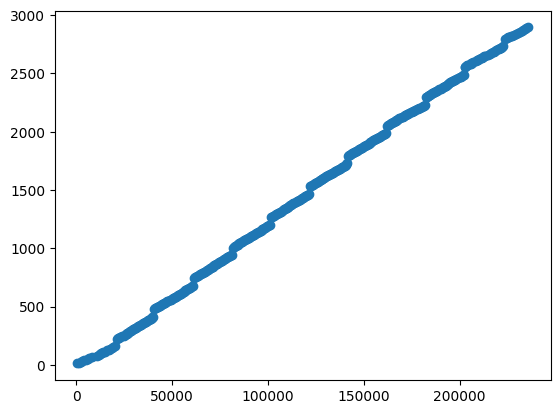

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 40.36666666666667 minutes


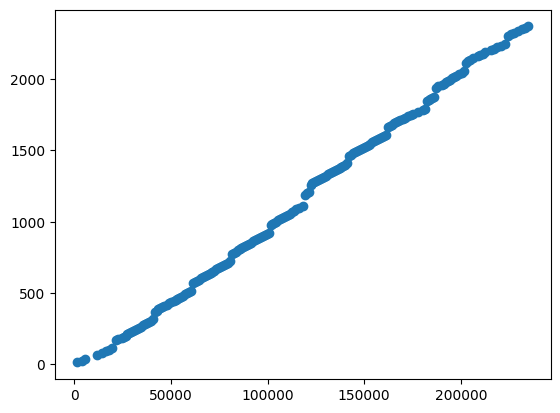

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S5K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 29.05 minutes


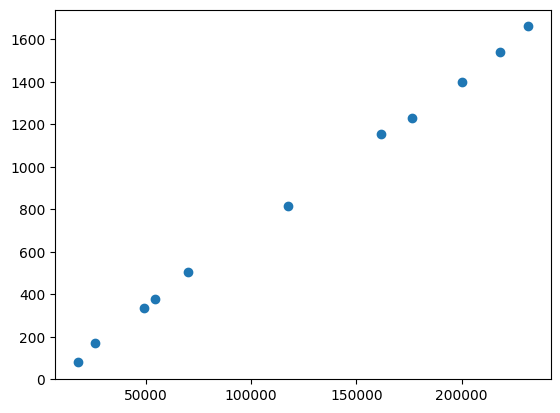

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S10K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 31.0 minutes


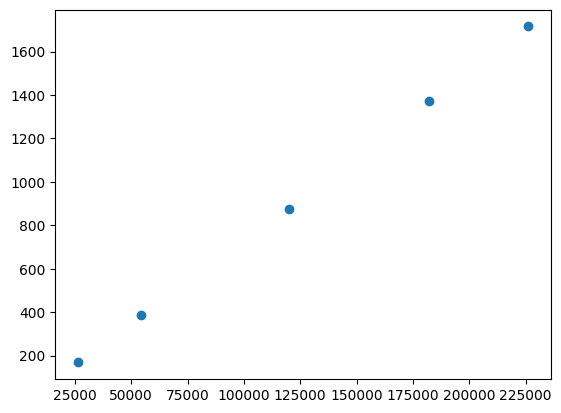

In [73]:

for infile in infiles:

    times_step_segm,\
        tuple_added_segm,\
        times_step_edge ,\
        tuple_added_edge = process_samples(infile)

#     plt.scatter(tuple_added_edge, times_step_edge)
#     plt.show()
    plt.scatter(tuple_added_segm, times_step_segm)
    plt.show()

In [74]:
infiles = ['/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log', 
           '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E10K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log', 
           '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E5K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log']

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E20K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 40.36666666666667 minutes


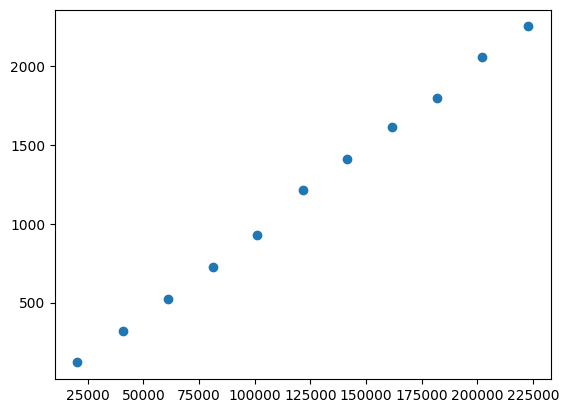

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E10K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 45.9 minutes


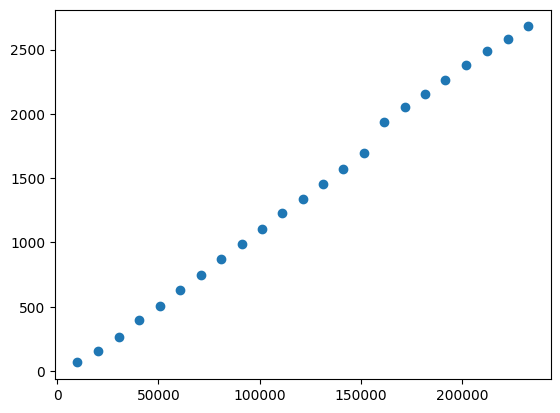

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_d77fc48_arrayefficient_withIOiCL_save_print_ref_p20_941_E5K-S1K_pya.0.17.1_conf2_all_ref_chrall_cap/run_peptides.ref_0.log
time to complete 42.15 minutes


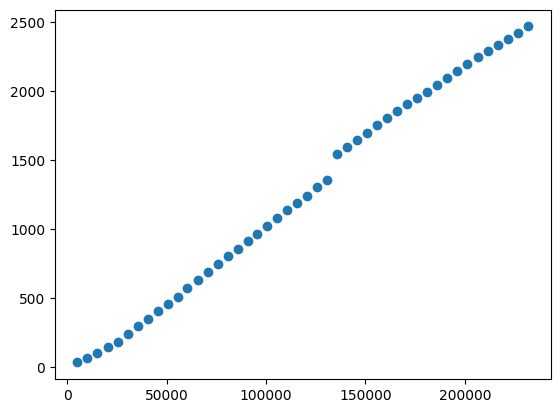

In [75]:

for infile in infiles:

    times_step_segm,\
        tuple_added_segm,\
        times_step_edge ,\
        tuple_added_edge = process_samples(infile)

#     plt.scatter(tuple_added_edge, times_step_edge)
#     plt.show()
    plt.scatter(tuple_added_edge, times_step_edge)
    plt.show()

1716.0